# Steps to solve Emergency vs Non-Emergency vehicle classification problem

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [2]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [3]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [4]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [5]:
# distribution of classes in the dataset
data['emergency_or_not'].value_counts()

emergency_or_not
0    1361
1     991
Name: count, dtype: int64

In [6]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [7]:
# shape of the image
X.shape

(2352, 224, 224, 3)

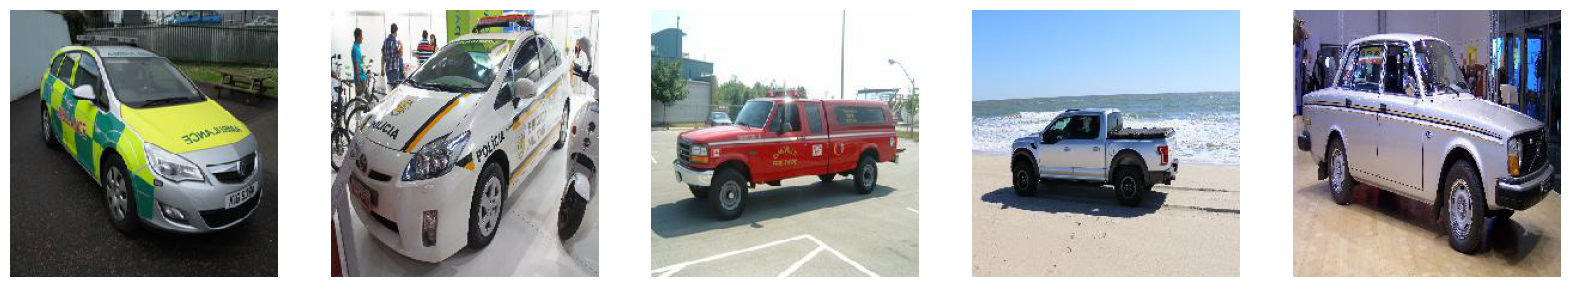

In [8]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

## 2. Pre-processing the data

In [9]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [10]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [11]:
# normalizing the pixel values
X = X / X.max()

In [12]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [13]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [14]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [15]:
X_train.shape[1]

150528

In [16]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [17]:
# summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Compiling the model

In [18]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

- total training images = 1646
- batch 128 
- 1 epoch = 1646/128 iterations 

### Iterations per epoch: 
$
\text{Iterations per epoch} = \frac{\text{Total training images}}{\text{Batch size}} 
= \frac{1646}{128} = 12.86 \approx 13
$


## 6. Training the model

In [20]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - accuracy: 0.7853 - loss: 0.4504 - val_accuracy: 0.7040 - val_loss: 0.5806
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.7855 - loss: 0.4678 - val_accuracy: 0.7096 - val_loss: 0.5367
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.8036 - loss: 0.4386 - val_accuracy: 0.7181 - val_loss: 0.5329
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.8084 - loss: 0.4254 - val_accuracy: 0.6728 - val_loss: 0.6022
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.8034 - loss: 0.4438 - val_accuracy: 0.7153 - val_loss: 0.5731
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.8039 - loss: 0.4384 - val_accuracy: 0.7280 - val_loss: 0.5268
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.7743 - loss: 0.4612 - val_accuracy: 0.6884 - val_loss: 0.6069
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.8294 - loss: 0.4055 - val_accuracy: 0.

## 7. Evaluating model performance

In [21]:
# getting predictions in the form of class as well as probabilities
prediction= model.predict(X_valid)[:,0]
predictions = np.where(prediction < 0.5, 0, 1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [22]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Accuracy on validation set: 0.7436260623229461 %


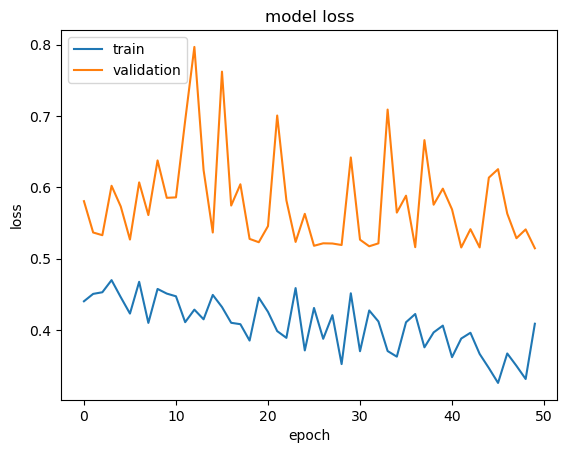

In [23]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

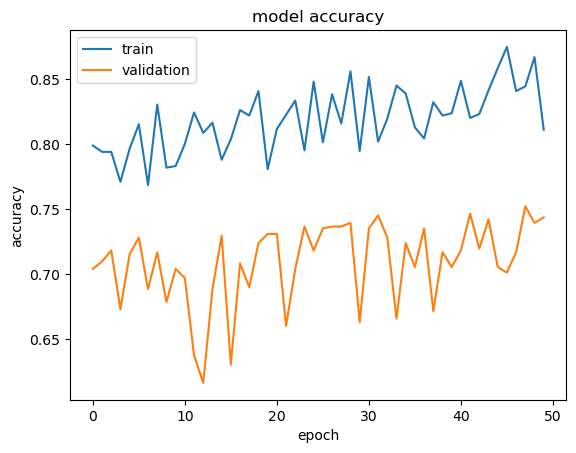

In [24]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
data.image_names.values

array(['0.jpg', '1.jpg', '2.jpg', ..., '2349.jpg', '2350.jpg', '2351.jpg'],
      dtype=object)

Model is 19 % sure that it is emergency
And actual class is  0


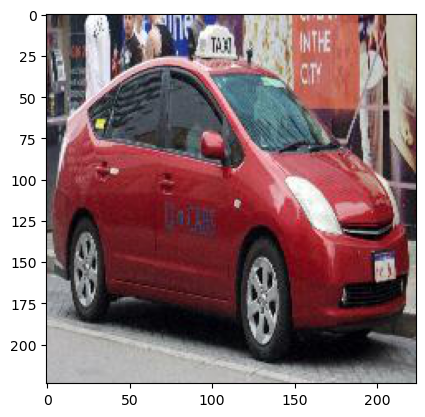

In [27]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles))) #will provide one value

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction * 100).astype(int)[index]

# read the image
img = plt.imread('Dataset/images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is emergency')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

# Hyperparameter tuning of neural networks

<ol>1. change activation function of hidden layer</ol>
<ol>2. increase hidden neurons</ol>
<ol>3. increase hidden layers</ol>
<ol>4. increase number of epochs</ol>
<ol>5. change optimizer</ol>

### 1. Changing activation function of hidden layer

In [75]:
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [76]:
# summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.5440 - loss: 2.2910 - val_accuracy: 0.5609 - val_loss: 0.6681
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5949 - loss: 0.6554 - val_accuracy: 0.5609 - val_loss: 0.6632
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6162 - loss: 0.6488 - val_accuracy: 0.6530 - val_loss: 0.6416
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6529 - loss: 0.6306 - val_accuracy: 0.6671 - val_loss: 0.6311
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6609 - loss: 0.6265 - val_accuracy: 0.6714 - val_loss: 0.6140
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6763 - loss: 0.6214 - val_accuracy: 0.6771 - val_loss: 0.6099
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.6463 - loss: 0.6251 - val_accuracy: 0.6912 - val_loss: 0.6003
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6388 - loss: 0.6248 - val_accuracy: 0.6246 - 

In [78]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy on validation set: 0.7110481586402266


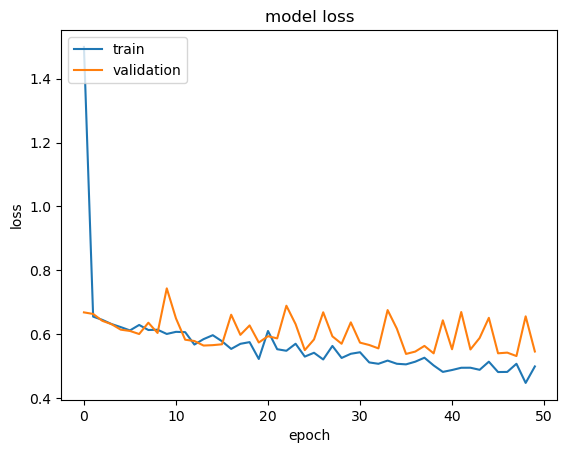

In [79]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 2. Increasing hidden neurons

In [80]:
# increase hidden neurons
model=Sequential()
model.add(InputLayer(shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [81]:
# model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 1024)                │     154,141,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,142,721 (588.01 MB)

 Trainable params: 154,142,721 (588.01 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 690ms/step - accuracy: 0.5205 - loss: 1.7397 - val_accuracy: 0.6558 - val_loss: 0.6378
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 579ms/step - accuracy: 0.6307 - loss: 0.6413 - val_accuracy: 0.6686 - val_loss: 0.6222
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 576ms/step - accuracy: 0.6726 - loss: 0.6215 - val_accuracy: 0.5609 - val_loss: 0.6928
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 565ms/step - accuracy: 0.5717 - loss: 0.7145 - val_accuracy: 0.6671 - val_loss: 0.6078
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 566ms/step - accuracy: 0.6781 - loss: 0.6067 - val_accuracy: 0.6728 - val_loss: 0.6014
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 565ms/step - accuracy: 0.6330 - loss: 0.6568 - val_accuracy: 0.6771 - val_loss: 0.5981
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 566ms/step - accuracy: 0.6994 - loss: 0.5888 - val_accuracy: 0.6176 - val_loss: 0.6513
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 564ms/step - accuracy: 0.6417 - loss: 0.6195 - val_accuracy: 0.

In [84]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)))


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
Accuracy on validation set: 0.6968838526912181


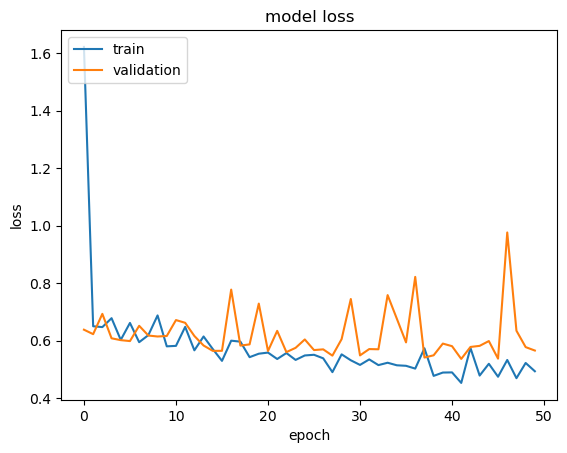

In [85]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 3. Increasing hidden layers

In [74]:
# increase hidden layers
model=Sequential()
model.add(InputLayer(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [75]:
# model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.5835 - loss: 0.6976 - val_accuracy: 0.5609 - val_loss: 0.6864
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5725 - loss: 0.6833 - val_accuracy: 0.5609 - val_loss: 0.6899
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5699 - loss: 0.6853 - val_accuracy: 0.5609 - val_loss: 0.6871
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5884 - loss: 0.6769 - val_accuracy: 0.5609 - val_loss: 0.6866
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5920 - loss: 0.6754 - val_accuracy: 0.5609 - val_loss: 0.6864
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5957 - loss: 0.6743 - val_accuracy: 0.5609 - val_loss: 0.6858
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5767 - loss: 0.6810 - val_accuracy: 0.5609 - val_loss: 0.6868
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5860 - loss: 0.6778 - val_accuracy: 0.5609 

In [77]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy on validation set: 0.5609065155807366


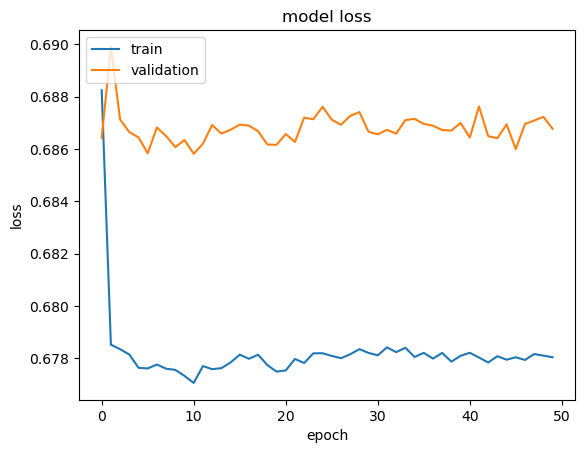

In [78]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 4. Increasing number of epochs

In [80]:
# increase number of epochs
model=Sequential()
model.add(InputLayer(shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [81]:
# model summary
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,053,001 (57.42 MB)

 Trainable params: 15,053,001 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.4932 - loss: 0.7261 - val_accuracy: 0.5609 - val_loss: 0.6850
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5678 - loss: 0.6822 - val_accuracy: 0.5609 - val_loss: 0.6877
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5919 - loss: 0.6758 - val_accuracy: 0.5609 - val_loss: 0.6964
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5966 - loss: 0.6756 - val_accuracy: 0.5609 - val_loss: 0.6888
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5843 - loss: 0.6806 - val_accuracy: 0.5609 - val_loss: 0.6881
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5949 - loss: 0.6742 - val_accuracy: 0.5609 - val_loss: 0.6856
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5672 - loss: 0.6841 - val_accuracy: 0.5609 - val_loss: 0.6881
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.5765 - loss: 0.6823 - val_accuracy: 0

In [84]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy on validation set: 0.5609065155807366


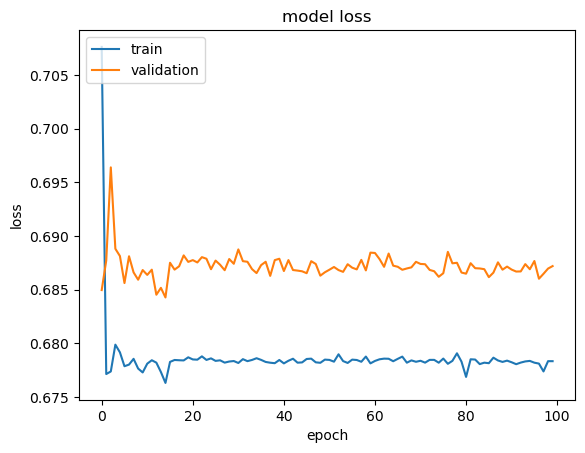

In [85]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 5. Changing the optimizer

In [86]:
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

In [87]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [89]:
# change optimizer
model=Sequential()

model.add(InputLayer(shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [90]:
# model summary
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,063,101 (57.46 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.5689 - loss: 0.6838 - val_accuracy: 0.5609 - val_loss: 0.6844
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 0.5765 - loss: 0.6798 - val_accuracy: 0.5609 - val_loss: 0.6833
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.5971 - loss: 0.6696 - val_accuracy: 0.5609 - val_loss: 0.6807
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.5826 - loss: 0.6760 - val_accuracy: 0.5609 - val_loss: 0.6842
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.5961 - loss: 0.6735 - val_accuracy: 0.5609 - val_loss: 0.6836
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.5850 - loss: 0.6759 - val_accuracy: 0.5609 - val_loss: 0.6825
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.5723 - loss: 0.6798 - val_accuracy: 0.5609 - val_loss: 0.6820
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.5712 - loss: 0.6798 - val_accu

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - accuracy: 0.5879 - loss: 0.6770 - val_accuracy: 0.5609 - val_loss: 0.6874
Epoch 52/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.5941 - loss: 0.6747 - val_accuracy: 0.5609 - val_loss: 0.6860
Epoch 53/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.5795 - loss: 0.6787 - val_accuracy: 0.5609 - val_loss: 0.6848
Epoch 54/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.5827 - loss: 0.6767 - val_accuracy: 0.5609 - val_loss: 0.6839
Epoch 55/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.5851 - loss: 0.6756 - val_accuracy: 0.5609 - val_loss: 0.6842
Epoch 56/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.6016 - loss: 0.6698 - val_accuracy: 0.5609 - val_loss: 0.6834
Epoch 57/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.5839 - loss: 0.6759 - val_accuracy: 0.5609 - val_loss: 0.6837
Epoch 58/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.5870 - loss: 0.6753 - val_accuracy:

In [92]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:, 0] < 0.5, 0, 1)))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy on validation set: 0.5609065155807366


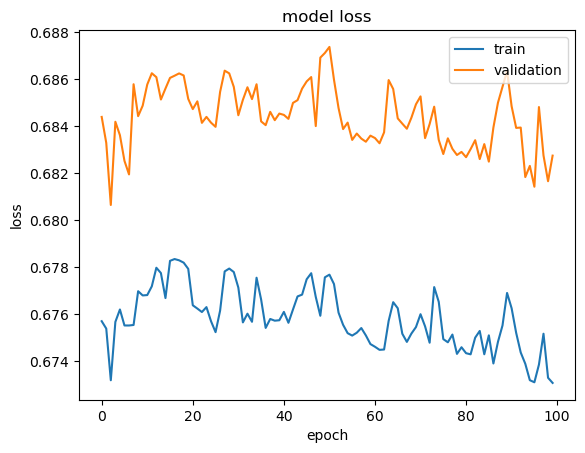

In [93]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

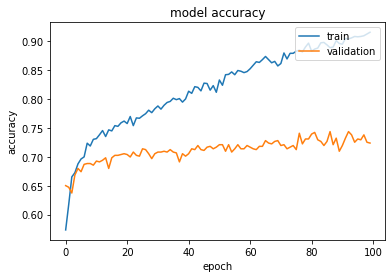

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()